# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#query url
query_url = f'{url}appid={weather_api_key}&q='


city_names =[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

count = 1

for city in cities:
    try:
        response = requests.get(query_url + city +'&units=imperial').json()

        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"City #{count}: {response['name']}")
        count = count + 1

    except:
        print(f'#{count}: {city} not found.\n')
        count = count + 1



City #1: Albany
City #2: Cabo San Lucas
City #3: Sørland
City #4: Fare
City #5: Fairmont
City #6: Chui
City #7: Atuona
City #8: Port Macquarie
City #9: Hermanus
City #10: Kapaa
City #11: Manokwari
City #12: Bethel
City #13: Provideniya
City #14: Napoleon
City #15: Rikitea
City #16: Thompson
City #17: Mataura
City #18: Ancud
City #19: Saint George
City #20: Severo-Kuril'sk
City #21: Vila Velha
City #22: Nouadhibou
City #23: Bluff
City #24: Port Elizabeth
City #25: Raudeberg
City #26: Maceió
City #27: Punta Arenas
City #28: Kruisfontein
City #29: Luís Correia
City #30: Kaitangata
City #31: Saint Paul Harbor
City #32: Nantucket
City #33: Chara
City #34: Paamiut
City #35: Pangody
City #36: Aykhal
City #37: George Town
City #38: Wewak
City #39: Jamestown
City #40: Rawson
City #41: Makarov
City #42: Eskişehir
City #43: Ushuaia
City #44: Tasiilaq
City #45: Lebu
City #46: Upernavik
#47: belushya guba not found.

City #48: Castro
City #49: Kavaratti
City #50: Mushie
City #51: Longhua
City #52: 

City #390: Egvekinot
City #391: Kostomuksha
City #392: Russkoye
City #393: Wasilla
City #394: Pouébo
City #395: Sioux Lookout
City #396: Biak
City #397: Lagoa
City #398: Morón
City #399: Monrovia
City #400: Richards Bay
City #401: Talcahuano
City #402: Awjilah
City #403: Juba
City #404: Cabedelo
City #405: Rezina
City #406: San José de Río Tinto
City #407: Gemena
City #408: Lixouri
#409: bury saint edmunds not found.

City #410: Yulara
City #411: Araouane
City #412: Cabra
City #413: Potiskum
City #414: Rio Grande
City #415: Karratha
City #416: San Francisco
City #417: Río Gallegos
#418: samusu not found.

#419: jujuy not found.

City #420: San Patricio
City #421: Kumul
City #422: Shache
City #423: Havre-St-Pierre
City #424: Kargasok
#425: alotau not found.

City #426: Balabac
City #427: Hidalgo
City #428: Bobrovka
City #429: At-Bashi
City #430: Jiuquan
City #431: Katherine
City #432: Airai
City #433: Kupang
City #434: Mt. Pleasant
City #435: Valparaíso
City #436: Esso
City #437: Evanst

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    'City': city_names,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,61.41,80,44,4.07,US,1632182283
1,Cabo San Lucas,22.8909,-109.9124,83.01,72,94,9.62,MX,1632182143
2,Sørland,67.6670,12.6934,46.54,86,100,23.13,NO,1632182283
3,Fare,-16.7000,-151.0167,79.05,69,12,13.22,PF,1632182284
4,Fairmont,39.4851,-80.1426,75.78,77,95,3.33,US,1632182217


In [5]:
def firstq(ser):
    return ser.quantile(.25)

def secondq(ser):
    return ser.quantile(.75)

summary_df = weather_df.agg(['count','mean','std','min',firstq, 'median', secondq, 'max'])[['Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]


summary_df


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
min,-54.800000,-179.166700,12.970000,9.000000,0.000000,0.000000,1.632182e+09
max,78.218600,179.316700,96.660000,100.000000,100.000000,36.460000,1.632183e+09
mean,19.846406,19.991598,62.588579,70.153005,54.526412,8.385246,1.632182e+09
std,34.155444,89.333039,16.683233,21.227614,39.806119,5.852979,1.183527e+02
firstq,-8.767600,-56.154900,50.050000,61.000000,10.000000,3.910000,1.632182e+09
median,24.800000,24.728400,65.660000,75.000000,65.000000,6.960000,1.632182e+09
secondq,49.086900,95.960900,76.330000,85.000000,96.000000,11.500000,1.632183e+09


In [6]:
weather_df.to_csv('weatherdata.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
len(weather_df)

549

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_series = weather_df[weather_df['Humidity'] > 100].index
index_series

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df = weather_df.drop(index_series)
len(weather_df)

549

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

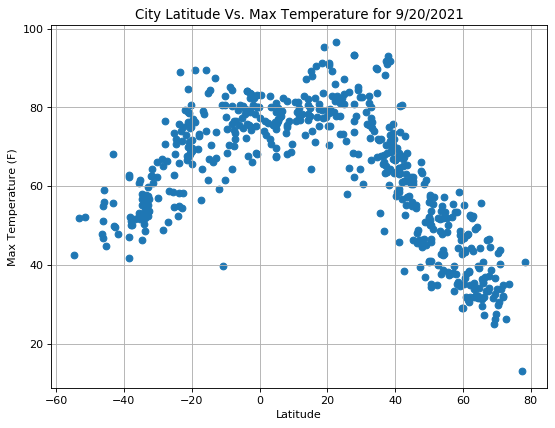

In [10]:
d = time.localtime()
date =(f"{d.tm_mon}/{d.tm_mday}/{d.tm_year}")

x = weather_df['Lat']

y = weather_df['Max Temp']


plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude Vs. Max Temperature for {date}")

plt.savefig('Latitude_vs_Temperature_Plot.png')
plt.show()


# Observation
* Cities with latitudes closer to 0, meaning closer to the equator, have higher Maximum Temperatures.

## Latitude vs. Humidity Plot

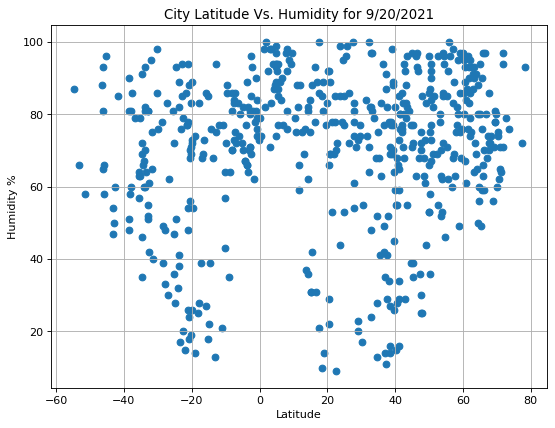

In [11]:
x = weather_df['Lat']

y = weather_df['Humidity']

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude Vs. Humidity for {date}")

plt.savefig('Latitude_vs_Humidity_Plot.png')
plt.show()

# Observation
* Cities with latitudes closer to the equator are more likely to have higher humidity.

## Latitude vs. Cloudiness Plot

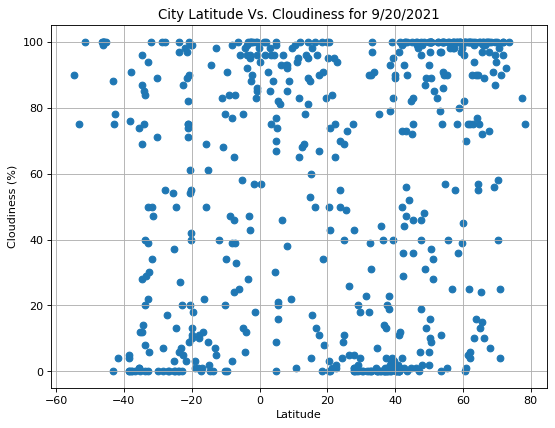

In [12]:
x = weather_df['Lat']

y = weather_df['Cloudiness']

plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs. Cloudiness for {date}")

plt.savefig('Latitude_vs_Cloudiness_Plot.png')
plt.show()

# Observation
* Many cities close to the equator are more likely to have high cloudiness percentages. 

## Latitude vs. Wind Speed Plot

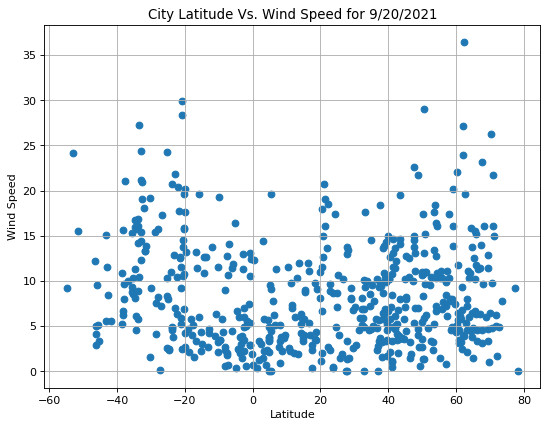

In [13]:
x = weather_df['Lat']

y = weather_df['Wind Speed']

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude Vs. Wind Speed for {date}")

plt.savefig('Latitude_vs_WindSpeed_Plot.png')
plt.show()

# Observation
* Cities near the euqator are less cloudy than cities in the northern and southern hemispheres

## Linear Regression

In [14]:
# northern hemisphere latitudes are positive
north_df = weather_df[weather_df['Lat'] >= 0]

south_df = weather_df[weather_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8428411628410339


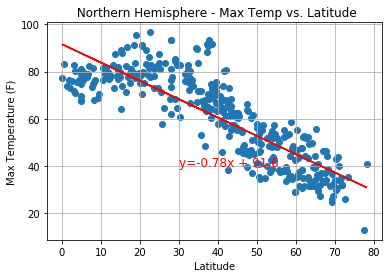

In [15]:
x = north_df['Lat']
y = north_df['Max Temp']

plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f" Northern Hemisphere - Max Temp vs. Latitude")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(30,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_MaxTemp_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7588787969282156


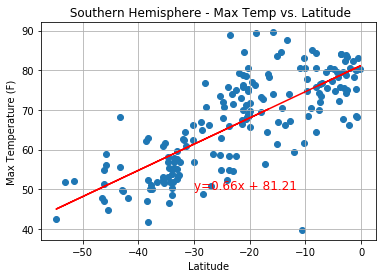

In [16]:
x = south_df['Lat']
y = south_df['Max Temp']

plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f" Southern Hemisphere - Max Temp vs. Latitude")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,50),fontsize=12,color="red")

plt.savefig('SouthHemisphere_MaxTemp_vs_Latitude_LinRegression.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.00705950592734772


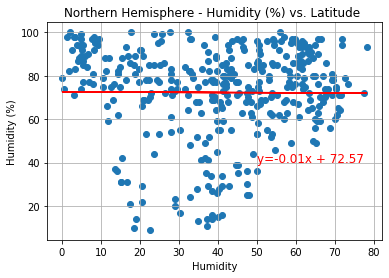

In [17]:
x = north_df['Lat']
y = north_df['Humidity']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Humidity")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(50,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_Humidity_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Humidity and latitiude in the northen hemisphere seem to have an minor affect on each other, or possibly no affect at all. The linear regression here shows that the humidity and distance from the equator are positively correlated though, which means that as the cities get closer to the north pole, the humidity increases. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09081699126318488


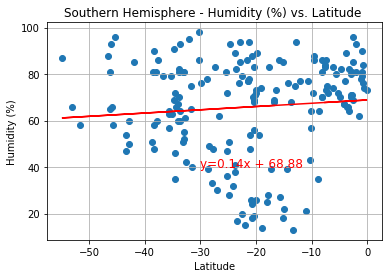

In [18]:
x = south_df['Lat']
y = south_df['Humidity']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('SouthHemisphere_Humidity_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Humidity and latitiude in the southern hemisphere seem to have an minor affect on each other, or possibly no affect at all. The linear regression here shows that the humidity and distance from the south pole are positively correlated though, which means that as the cities get closer to the equator, the humidity increases. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1353148066218295


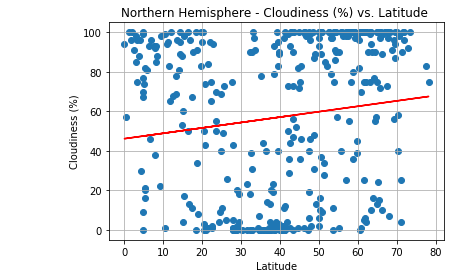

In [19]:
x = north_df['Lat']
y = north_df['Cloudiness']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_Cloudiness_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Cities near the north pole are more cloudy than cities closer to the equator. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1183992308053713


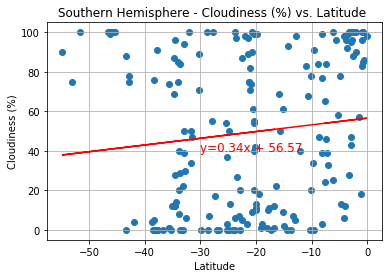

In [20]:
x = south_df['Lat']
y = south_df['Cloudiness']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('SouthHemisphere_Cloudiness_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Cities near the equator are more cloudy than cities closer to the south pole. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2326303310852031


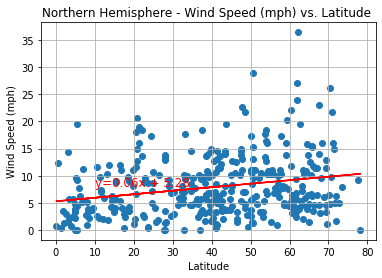

In [21]:
x = north_df['Lat']
y = north_df['Wind Speed']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(10,8),fontsize=12,color="red")

plt.savefig('NorthHemisphere_WindSpeed_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Cities near the equator are less windy than cities closer to the north pole. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3204751481116325


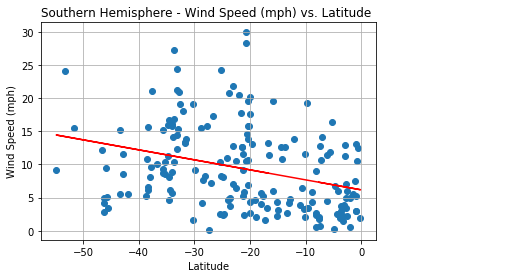

In [22]:
x = south_df['Lat']
y = south_df['Wind Speed']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(10,8),fontsize=12,color="red")

plt.savefig('SouthHemisphere_WindSpeed_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Cities near the equator are less windy than cities closer to the south pole. 